In [1]:
import pandas as pd
import requests
from io import StringIO

url = 'https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json'

response = requests.get(url)
if response.status_code == 200:
    data = pd.read_json(StringIO(response.text))
else:
    print(f'{response.status_code}')


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1346
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1347 non-null   object 
 1   gt_corners    1347 non-null   int64  
 2   rb_corners    1347 non-null   int64  
 3   mean          1347 non-null   float64
 4   max           1347 non-null   float64
 5   min           1347 non-null   float64
 6   floor_mean    1347 non-null   float64
 7   floor_max     1347 non-null   float64
 8   floor_min     1347 non-null   float64
 9   ceiling_mean  1347 non-null   float64
 10  ceiling_max   1347 non-null   float64
 11  ceiling_min   1347 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 136.8+ KB


In [3]:
data[:50]

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029
5,Wohnzimmer,4,4,18.201964,30.170499,9.929660,18.091045,28.885998,9.929660,18.312884,30.170499,9.932862
6,Büro,6,6,4.155999,6.492000,0.338442,4.036335,6.347297,0.338442,4.275663,6.492000,0.436603
7,Flur,6,6,0.728829,1.781801,0.210813,0.695057,1.756475,0.210813,0.762602,1.781801,0.240982
8,Flur,4,4,15.445758,55.451122,0.034334,0.363172,0.655042,0.034334,30.528344,55.451122,11.313012
9,Eingangsbereich,4,4,19.379779,41.845995,0.179151,0.759095,1.373219,0.179151,38.000463,41.845995,33.773640


Since the label represents the number of corners in the room, we can consider the problem that was solved using the model as a regression problem.  
Mean square error (MSE), mean absolute error (MAE) and R-squared (R2) are the main statistical indicators used to evaluate the effectiveness of regression models.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
real_values = data['gt_corners']
predicted_values = data['rb_corners']

mae = mean_absolute_error(real_values, predicted_values)
mse = mean_squared_error(real_values, predicted_values)
r2 = r2_score(real_values, predicted_values)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.0
MSE: 0.0
R2: 1.0


Model achieves perfect metrics, with errors equal to zero and quality metrics at one, it suggests that the model's predictions are in complete agreement with the actual labels for all examples in the dataset. However, without knowledge of the data on which the model was trained, the architecture of the model, and the specifics of the dataset used to obtain these results, it is not possible to definitively interpret these outcomes. Such perfect scores may indicate a model that has learned to generalize exceptionally well to new data. However, it could also suggest potential issues such as overfitting, where the model has learned to memorize the training data rather than generalize from it, or a lack of diversity in the test dataset. It is also crucial to consider the possibility of data leakage during the training process, where information from the test set is inadvertently used to train the model, leading to artificially high performance. Therefore, while perfect metrics are desirable, they require a thorough investigation in order to ensure the robustness of the model and its ability to perform well on unseen data.

In [5]:
different_rows = data.query('gt_corners != rb_corners')

print(different_rows)

Empty DataFrame
Columns: [name, gt_corners, rb_corners, mean, max, min, floor_mean, floor_max, floor_min, ceiling_mean, ceiling_max, ceiling_min]
Index: []


Indeed, no example has been found where the predicted and actual labels differ.

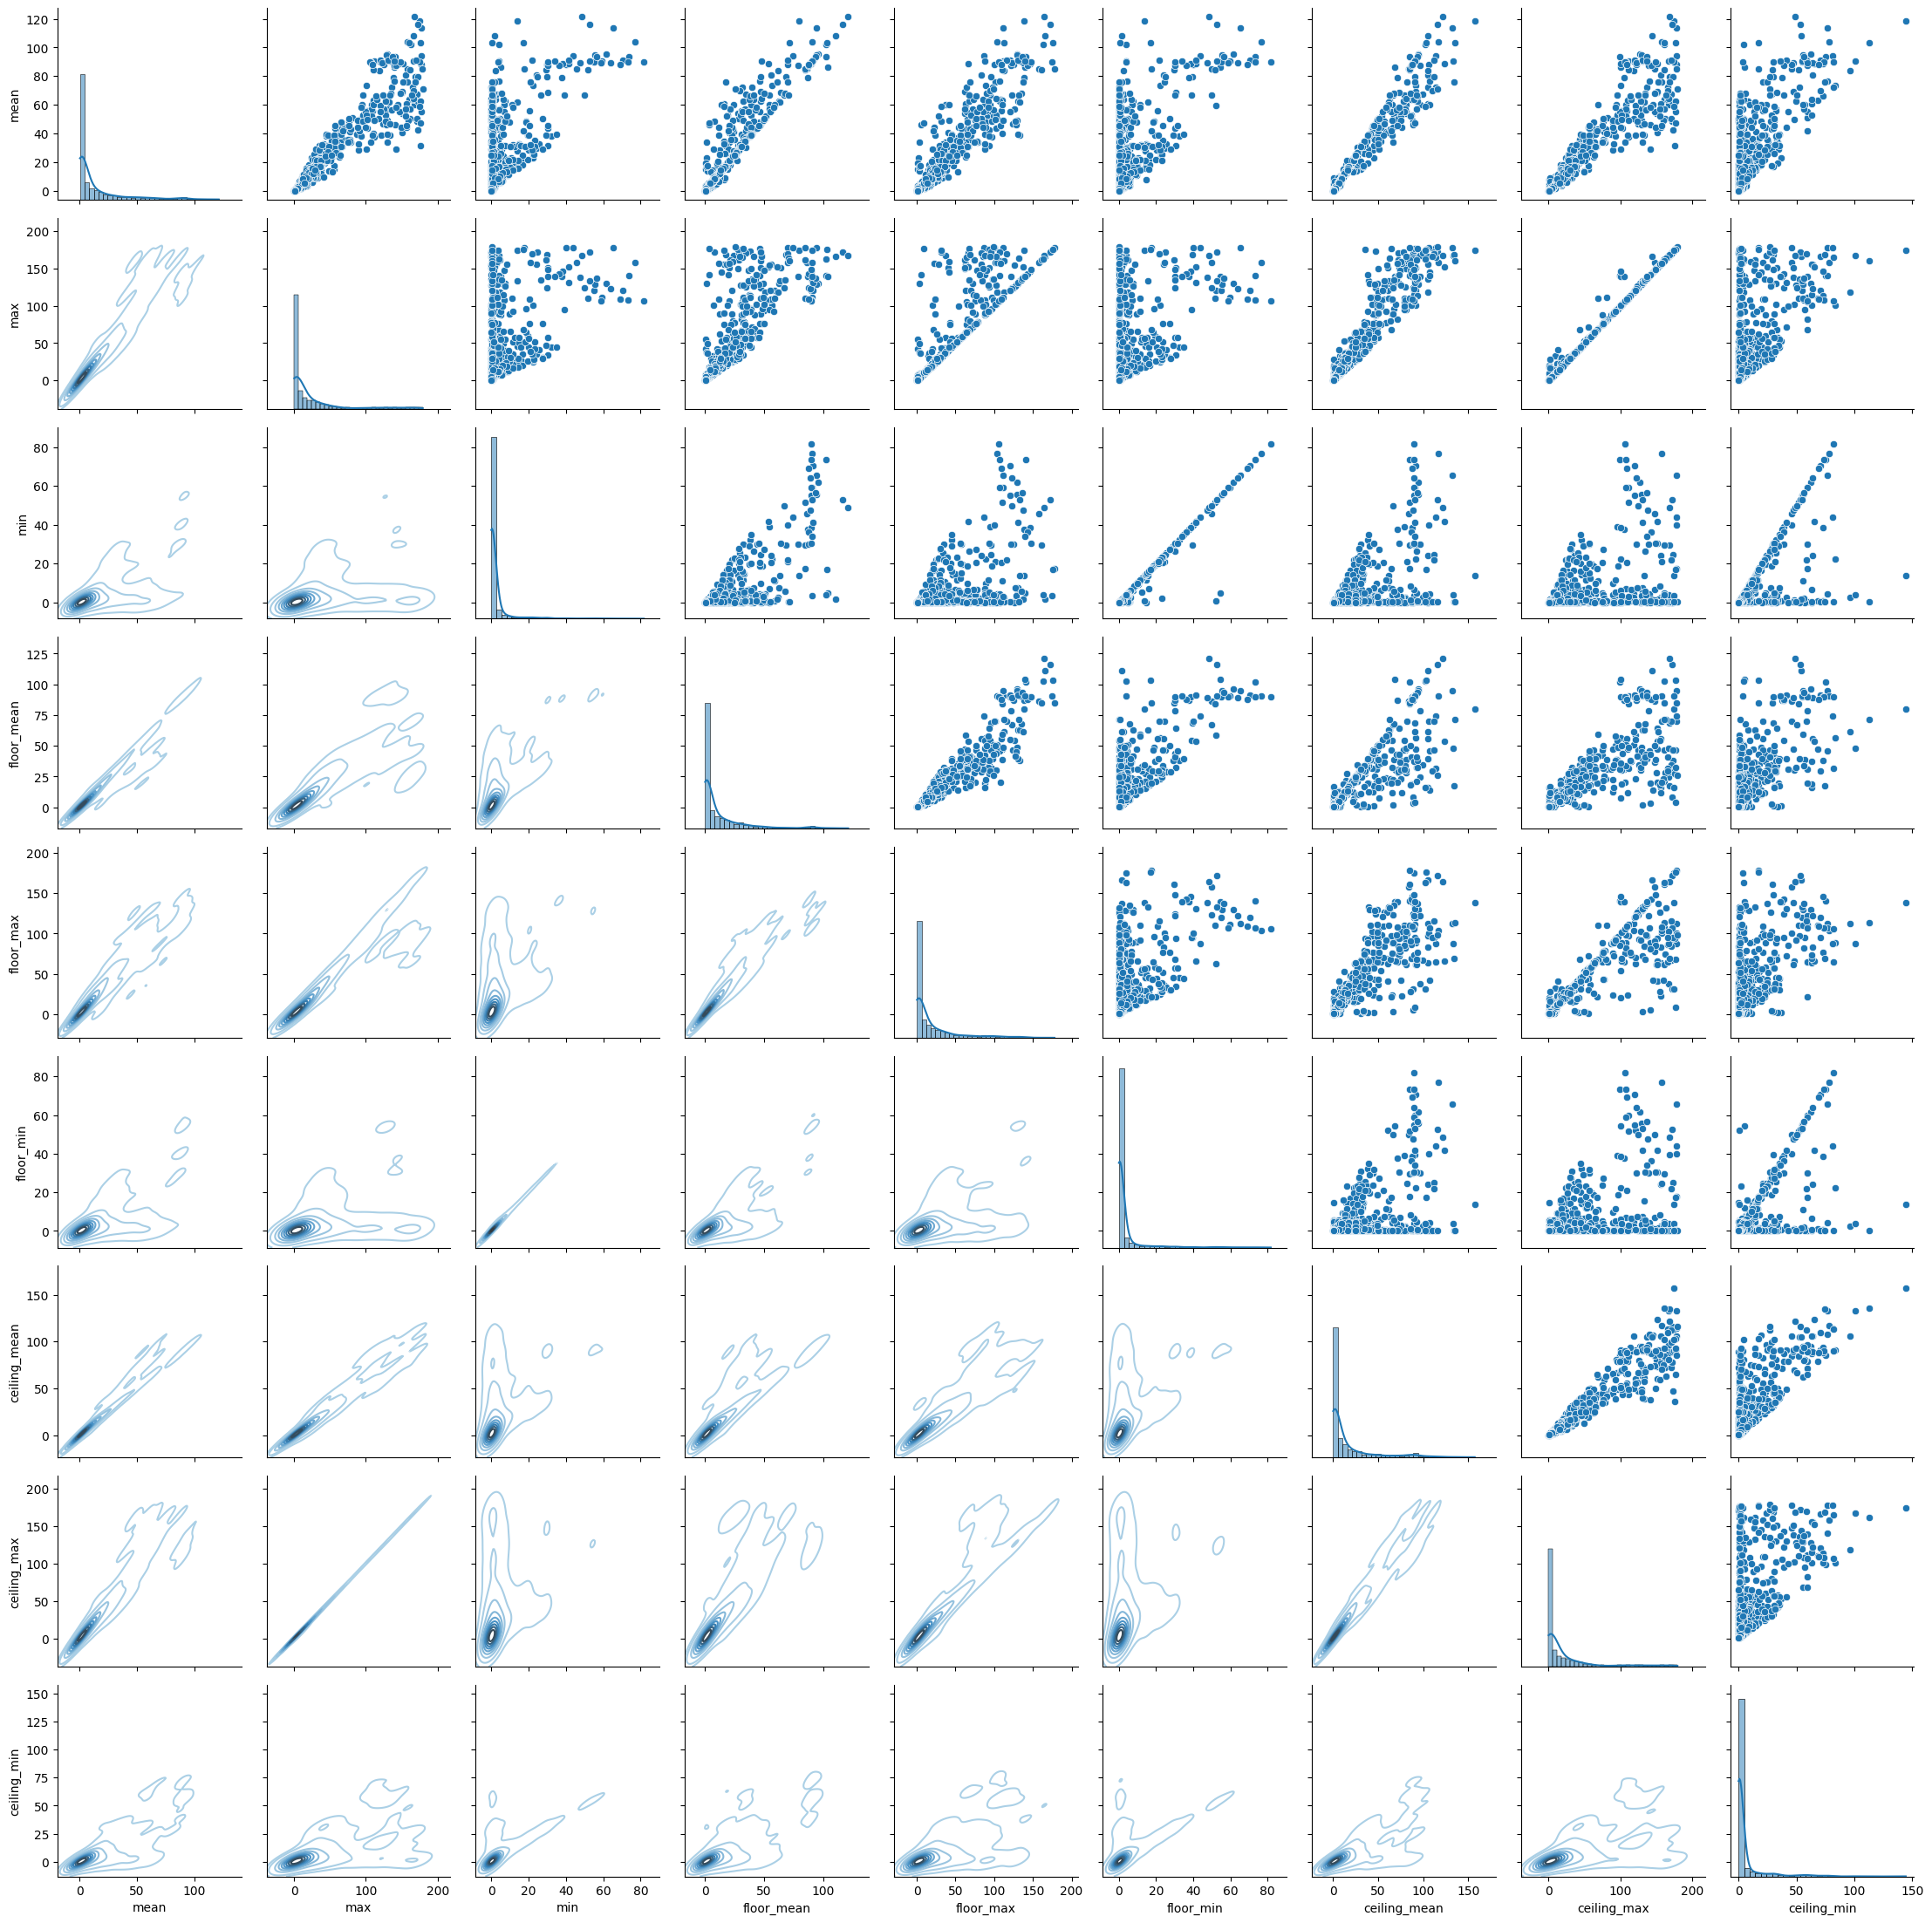

In [8]:
from IPython.display import display, Image
display(Image("plots/pairgrid.png"))